
## **Import of the Dataset and the modules**




In [ ]:
import pandas as pd # For dataframes (tables)
import numpy as np # For numerical operations
import math 
import matplotlib.pyplot as plt # For plots
import os # To import external python files
import sys# To import external python files

from pandas.plotting import scatter_matrix

In [ ]:
path_to_traininginputs="https://raw.githubusercontent.com/Werner-DB/ML_Project/main/traininginputs.csv"
!wget $path_to_traininginputs #Here we pull the dataset from the git repository

--2022-01-26 15:03:34--  https://raw.githubusercontent.com/Werner-DB/ML_Project/main/traininginputs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3466600 (3.3M) [text/plain]
Saving to: ‘traininginputs.csv’

traininginputs.csv  100%[===================>]   3.31M  --.-KB/s    in 0.03s   

2022-01-26 15:03:34 (114 MB/s) - ‘traininginputs.csv’ saved [3466600/3466600]



In [ ]:
path_to_trainingoutput="https://raw.githubusercontent.com/Werner-DB/ML_Project/main/trainingoutput.csv"
!wget $path_to_trainingoutput 

--2022-01-26 15:03:34--  https://raw.githubusercontent.com/Werner-DB/ML_Project/main/trainingoutput.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1035496 (1011K) [text/plain]
Saving to: ‘trainingoutput.csv’

trainingoutput.csv  100%[===================>]   1011K  --.-KB/s    in 0.02s   

2022-01-26 15:03:34 (52.7 MB/s) - ‘trainingoutput.csv’ saved [1035496/1035496]



In [ ]:
ls 

sample_data/  traininginputs.csv  trainingoutput.csv


In [ ]:
df = pd.read_csv('traininginputs.csv')
df_out = pd.read_csv('trainingoutput.csv')

In [ ]:
df.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61


In [ ]:
df_out.head()

,PROC_TRACEINFO,Binar OP130_Resultat_Global_v
0,I-B-XA1207672-190429-00688,0
1,I-B-XA1207672-190828-00973,0
2,I-B-XA1207672-190712-03462,0
3,I-B-XA1207672-190803-00051,0
4,I-B-XA1207672-190508-03248,0


Below, we are adding a column id our DataFrame that contains the results (if the motors are rejected or not).

In [ ]:
df['results'] = df_out['Binar OP130_Resultat_Global_v']

In [ ]:
df.head()

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,results
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,0
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,0
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,0


## **Pre-Processing**

In [ ]:
df.shape

(34515, 15)

This dataset is 14 columns and 34515 lines of different engine data.

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34515 entries, 0 to 34514
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PROC_TRACEINFO                   34515 non-null  object 
 1   OP070_V_1_angle_value            34515 non-null  float64
 2   OP090_SnapRingPeakForce_value    34515 non-null  float64
 3   OP070_V_2_angle_value            34515 non-null  float64
 4   OP120_Rodage_I_mesure_value      34515 non-null  float64
 5   OP090_SnapRingFinalStroke_value  34515 non-null  float64
 6   OP110_Vissage_M8_torque_value    34515 non-null  float64
 7   OP100_Capuchon_insertion_mesure  15888 non-null  float64
 8   OP120_Rodage_U_mesure_value      34515 non-null  float64
 9   OP070_V_1_torque_value           34515 non-null  float64
 10  OP090_StartLinePeakForce_value   34515 non-null  float64
 11  OP110_Vissage_M8_angle_value     34515 non-null  float64
 12  OP090_SnapRingMidP

All of our columns consists of numbers (floats for the features and integers for the results) except the first one that is only objects ( we interpret it as Strings ).


In [ ]:
df.head(n=11)

,PROC_TRACEINFO,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP100_Capuchon_insertion_mesure,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,results
0,I-B-XA1207672-190429-00688,180.4,190.51,173.1,113.64,12.04,12.16,NaN,11.97,6.62,26.37,18.8,109.62,6.60,0
1,I-B-XA1207672-190828-00973,138.7,147.70,163.5,109.77,12.12,12.19,0.39,11.97,6.41,21.03,18.5,105.48,6.40,0
2,I-B-XA1207672-190712-03462,180.9,150.87,181.2,109.79,11.86,12.24,NaN,11.97,6.62,25.81,17.5,100.03,6.61,0
3,I-B-XA1207672-190803-00051,173.5,159.56,151.8,113.25,11.82,12.35,0.39,11.97,6.62,24.62,15.6,104.94,6.61,0
4,I-B-XA1207672-190508-03248,174.5,172.29,177.5,112.88,12.07,12.19,NaN,11.97,6.62,29.22,33.6,99.19,6.61,0
5,I-B-XA1207672-190528-02374,158.7,165.79,178.4,112.09,11.88,12.15,NaN,11.97,6.62,25.99,22.3,97.13,6.63,0
6,I-B-XA1207672-190830-03109,158.8,153.91,152.5,111.25,12.11,12.19,0.38,11.97,6.41,18.79,17.7,81.56,6.40,0
7,I-B-XA1207672-190706-01534,181.0,164.02,175.8,117.50,11.75,12.14,NaN,11.97,6.61,24.33,36.0,95.12,6.62,0
8,I-B-XA1207672-190504-00200,156.1,159.50,151.8,111.75,12.09,12.21,NaN,11.97,6.61,26.07,16.6,101.57,6.61,0
9,I-B-XA1207672-190528-01796,159.4,162.99,128.3,107.68,11.88,12.35,NaN,11.98,6.62,24.05,17.9,99.20,6.60,0


  We are seeing that some values are defined as NaN , meaning that some of them are missing. Lets find out where they are located?

In [ ]:
df.columns[df.isnull().any()].tolist() 

['OP100_Capuchon_insertion_mesure']

Here the only column containing missing values is "OP100_Capuchon_insertion_mesure". Lets analyze that column.

In [ ]:
print("Percentage of missing values = ",round(df['OP100_Capuchon_insertion_mesure'].isna().sum()*100/34514,2),"%")



Percentage of missing values =  53.97 %


Here we have more tah 50% of missing values therefore we can consider that column as not complete enough to be used in our dataset. So we get rid of the column in our dataset.

In [ ]:
df_cleaned = df.drop(columns= ['OP100_Capuchon_insertion_mesure'])
df_cleaned.columns[df_cleaned.isnull().any()].tolist() 


[]

Now we have a clean dataset with no missing values (df_cleaned) , thanks to pre-processing. We are choosing not to encode the first column since it has no statistical meaning and is just used to identify the engines.

## **Basic Statistics**

In [ ]:
df_cleaned.describe()

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,results
count,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000,34515.000000
mean,159.906922,156.915055,159.618236,113.350222,11.970190,12.256785,11.971027,6.548403,23.630152,17.878398,97.700978,6.550867,0.008837
std,15.662650,11.271492,15.091490,3.528522,0.169873,0.065319,0.003050,0.097602,2.546341,6.785079,6.837714,0.094814,0.093589
min,101.800000,0.000000,82.000000,99.990000,0.000000,12.030000,11.970000,5.670000,0.000000,6.300000,0.000000,5.740000,0.000000
25%,148.700000,149.210000,149.400000,111.040000,11.850000,12.210000,11.970000,6.410000,22.280000,13.500000,94.310000,6.420000,0.000000
50%,158.000000,156.180000,158.700000,113.160000,12.040000,12.260000,11.970000,6.610000,23.880000,16.400000,98.500000,6.610000,0.000000
75%,169.300000,164.380000,168.900000,115.380000,12.080000,12.300000,11.970000,6.620000,25.290000,20.200000,102.230000,6.610000,0.000000
max,198.300000,196.920000,198.100000,177.950000,12.190000,12.500000,11.990000,6.670000,43.410000,84.600000,127.300000,6.670000,1.000000


In [ ]:
df_cleaned["results"].describe()

count    34515.000000
mean         0.008837
std          0.093589
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: results, dtype: float64

We notice that the mean and the standard deviation of the $results$ variable are very close to zero. And there can be only two possibilities (0 or 1). It means that most of the time the results equals to 0 $⇒$ Most motors pass the test successfully.

### BoxPlot

**All the values regarding the OP070 automaton**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40612b8f50>,
      dtype=object)

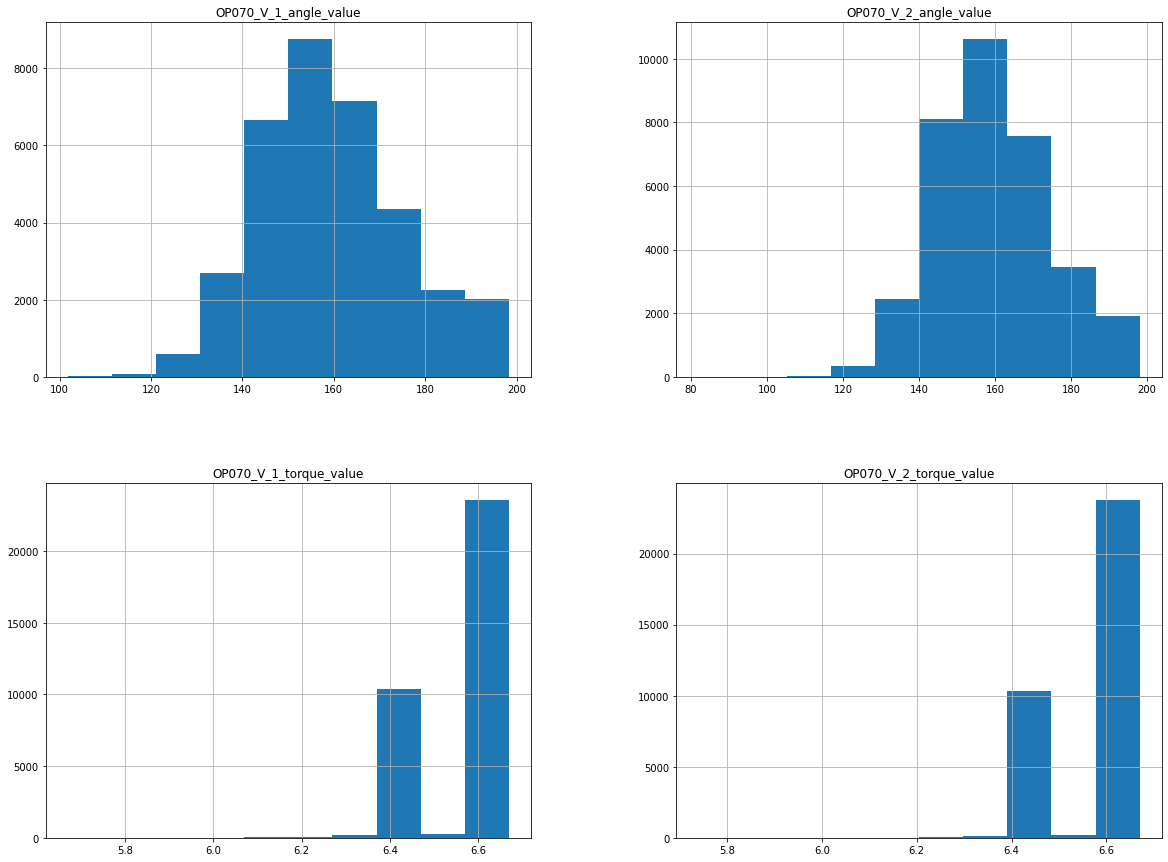

In [ ]:
df_cleaned[['OP070_V_1_angle_value','OP070_V_2_angle_value','OP070_V_1_torque_value','OP070_V_2_torque_value']].hist(figsize=(20,15))

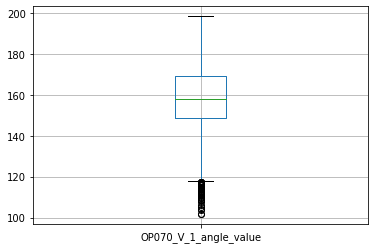

In [ ]:
df_cleaned.boxplot(column=['OP070_V_1_angle_value'])

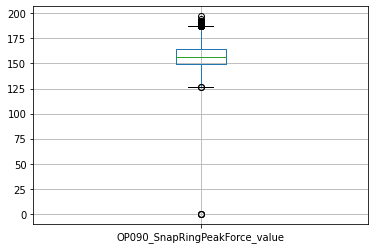

In [ ]:
df_cleaned.boxplot(column=['OP090_SnapRingPeakForce_value']) 

## **Correlations**


In [ ]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

--2022-01-26 15:03:37--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13008 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.70K  --.-KB/s    in 0s      

2022-01-26 15:03:37 (75.3 MB/s) - ‘visualization.py’ saved [13008/13008]



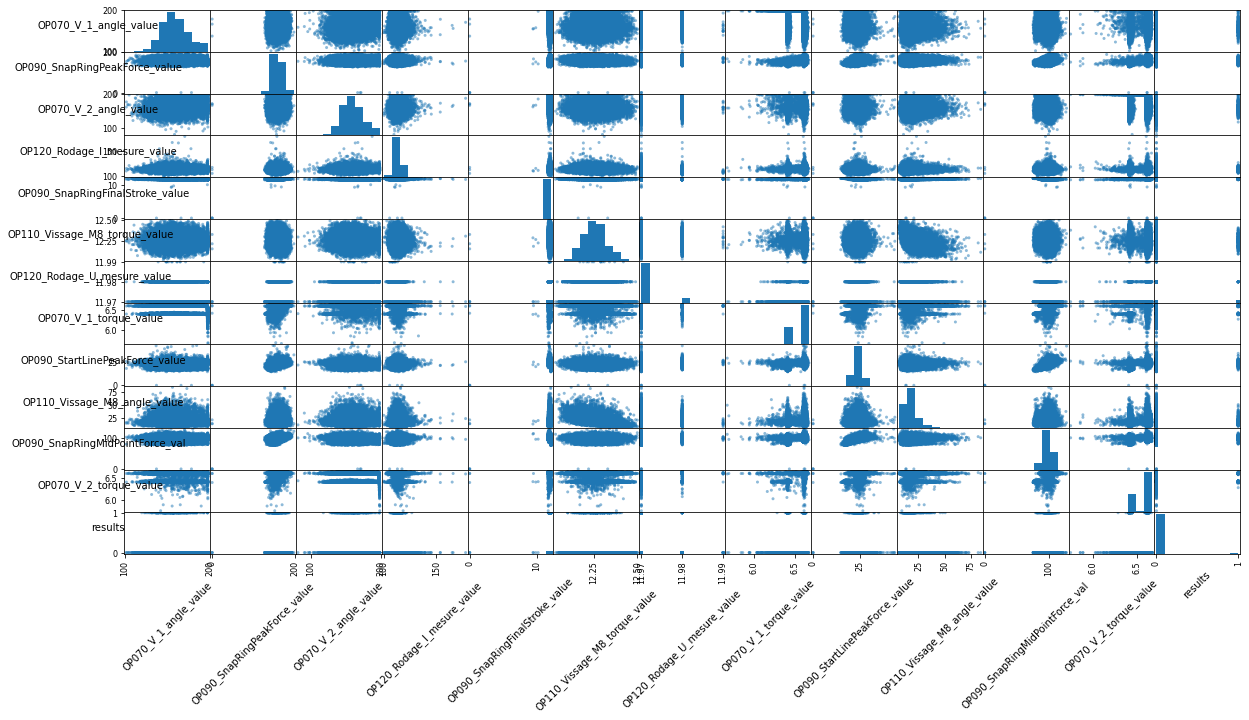

In [ ]:
sm = scatter_matrix(df_cleaned, figsize=(20,10))
visualization.rotate_labels(sm)
plt.show()

Here we have no need to plot label since it has no meaning.


Here we see that some of the values are skewed (OP090_SnapRingFinalStroke_value or OP120_Rodage_U_mesure_value), so we should try to spread the value using a log transformation.

In [ ]:
cols_to_transform = ['OP090_SnapRingFinalStroke_value' ,'OP120_Rodage_U_mesure_value']

cols_transformed = [i + "_log" for i in cols_to_transform]
df_cleaned[cols_transformed] = df_cleaned[cols_to_transform].transform(
                        func=lambda x : np.log(x+1)) #try exp

Now the new scatter matrix

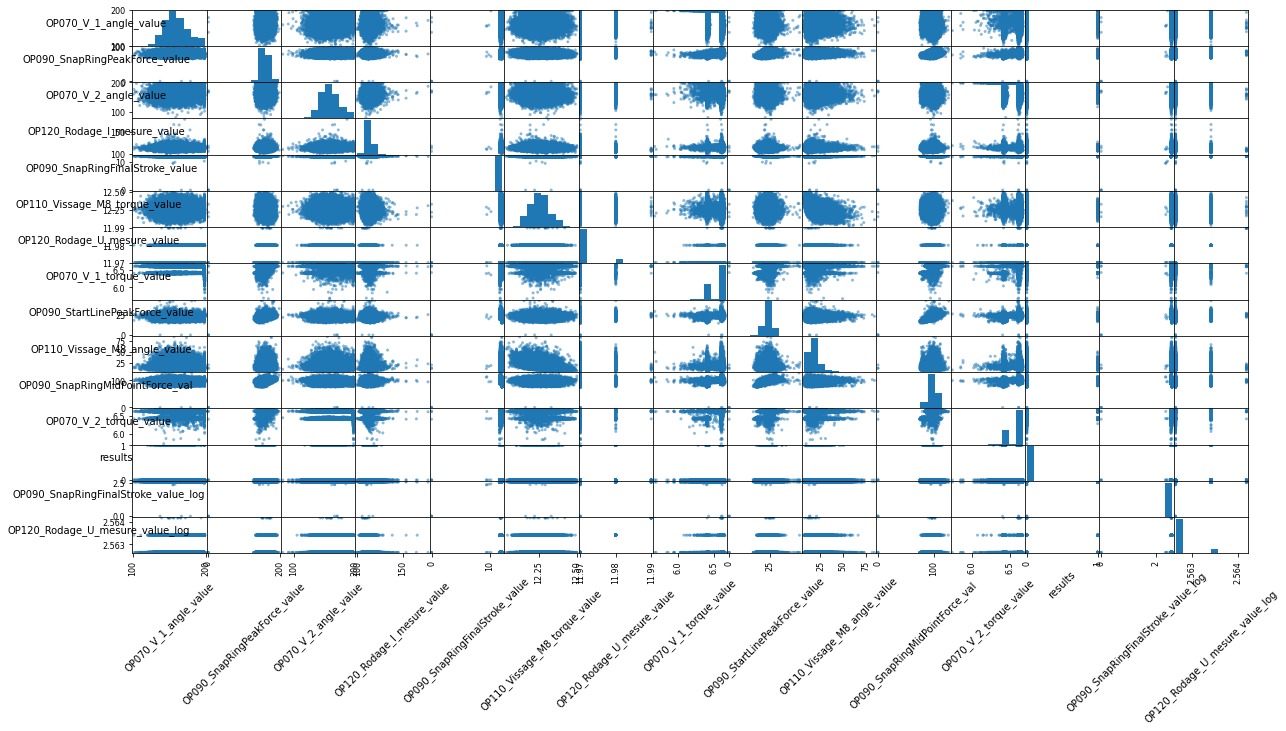

In [ ]:
sm = scatter_matrix(df_cleaned, figsize=(20,10))
visualization.rotate_labels(sm)
plt.show()

The results are not conclusive, the transformation by log was not a good transformation. So we get rid of these columns

In [ ]:
df_cleaned = df_cleaned.drop(cols_transformed,axis=1)

### Pearson's correlation


In [ ]:
corrmatrix = df_cleaned.corr().round(2)
corrmatrix

,OP070_V_1_angle_value,OP090_SnapRingPeakForce_value,OP070_V_2_angle_value,OP120_Rodage_I_mesure_value,OP090_SnapRingFinalStroke_value,OP110_Vissage_M8_torque_value,OP120_Rodage_U_mesure_value,OP070_V_1_torque_value,OP090_StartLinePeakForce_value,OP110_Vissage_M8_angle_value,OP090_SnapRingMidPointForce_val,OP070_V_2_torque_value,results
OP070_V_1_angle_value,1.00,0.01,0.19,0.04,-0.09,-0.02,-0.01,-0.01,0.06,0.01,0.07,0.07,-0.01
OP090_SnapRingPeakForce_value,0.01,1.00,0.04,0.06,0.08,-0.13,0.14,0.49,0.34,0.11,0.35,0.48,-0.01
OP070_V_2_angle_value,0.19,0.04,1.00,0.04,-0.06,-0.03,0.00,0.06,0.05,0.02,0.05,0.02,-0.01
OP120_Rodage_I_mesure_value,0.04,0.06,0.04,1.00,0.06,-0.05,-0.12,0.03,0.00,0.03,0.05,0.03,0.00
OP090_SnapRingFinalStroke_value,-0.09,0.08,-0.06,0.06,1.00,-0.10,-0.02,-0.38,-0.38,0.02,-0.08,-0.41,0.02
OP110_Vissage_M8_torque_value,-0.02,-0.13,-0.03,-0.05,-0.10,1.00,-0.03,-0.08,0.01,-0.45,-0.06,-0.07,-0.00
OP120_Rodage_U_mesure_value,-0.01,0.14,0.00,-0.12,-0.02,-0.03,1.00,0.17,0.09,0.01,0.06,0.17,-0.01
OP070_V_1_torque_value,-0.01,0.49,0.06,0.03,-0.38,-0.08,0.17,1.00,0.54,0.11,0.33,0.90,-0.04
OP090_StartLinePeakForce_value,0.06,0.34,0.05,0.00,-0.38,0.01,0.09,0.54,1.00,0.04,0.62,0.56,0.01
OP110_Vissage_M8_angle_value,0.01,0.11,0.02,0.03,0.02,-0.45,0.01,0.11,0.04,1.00,0.07,0.11,0.01


### Visualization

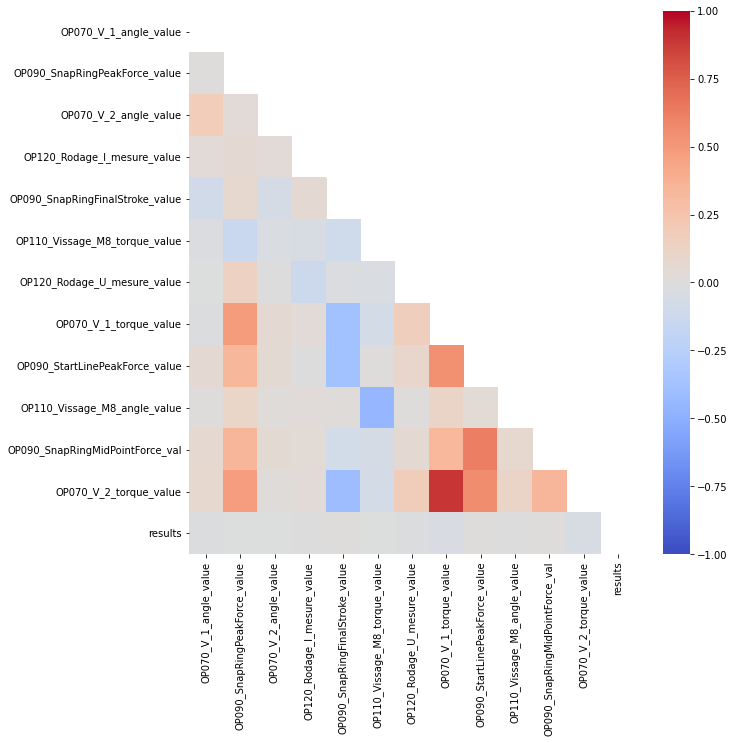

In [ ]:
visualization.plot_corr(df_cleaned,width=10, height=10,print_value=False)

### Feature Importance


In [ ]:
# From the course library
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering

--2022-01-26 15:04:57--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2206 (2.2K) [text/plain]
Saving to: ‘feature_engineering.py’

feature_engineering 100%[===================>]   2.15K  --.-KB/s    in 0s      

2022-01-26 15:04:57 (18.3 MB/s) - ‘feature_engineering.py’ saved [2206/2206]



In [ ]:
values_corr = feature_engineering.get_most_correlated(df_cleaned)
values_corr[:20]

OP070_V_1_torque_value           OP070_V_2_torque_value             0.897
OP090_StartLinePeakForce_value   OP090_SnapRingMidPointForce_val    0.621
                                 OP070_V_2_torque_value             0.562
OP070_V_1_torque_value           OP090_StartLinePeakForce_value     0.543
OP090_SnapRingPeakForce_value    OP070_V_1_torque_value             0.490
                                 OP070_V_2_torque_value             0.482
OP110_Vissage_M8_torque_value    OP110_Vissage_M8_angle_value      -0.446
OP090_SnapRingFinalStroke_value  OP070_V_2_torque_value            -0.408
                                 OP090_StartLinePeakForce_value    -0.381
                                 OP070_V_1_torque_value            -0.381
OP090_SnapRingMidPointForce_val  OP070_V_2_torque_value             0.347
OP090_SnapRingPeakForce_value    OP090_SnapRingMidPointForce_val    0.345
                                 OP090_StartLinePeakForce_value     0.337
OP070_V_1_torque_value           OP090

Big link -> try to remove some

In [ ]:
df_cleaned.to_csv("dataset_cleaned.csv", index=False)

In [ ]:
!ls

dataset_cleaned.csv	__pycache__  traininginputs.csv  visualization.py
feature_engineering.py	sample_data  trainingoutput.csv


In [ ]:
list(df_cleaned.columns)[:-1]

['PROC_TRACEINFO',
 'OP070_V_1_angle_value',
 'OP090_SnapRingPeakForce_value',
 'OP070_V_2_angle_value',
 'OP120_Rodage_I_mesure_value',
 'OP090_SnapRingFinalStroke_value',
 'OP110_Vissage_M8_torque_value',
 'OP120_Rodage_U_mesure_value',
 'OP070_V_1_torque_value',
 'OP090_StartLinePeakForce_value',
 'OP110_Vissage_M8_angle_value',
 'OP090_SnapRingMidPointForce_val',
 'OP070_V_2_torque_value']